In [153]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [154]:
# Membaca dataFrame
df = pd.read_csv('Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [156]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [157]:
# menghapus baris yang mengandung missing values di kolom Profesi
data_cleaned = df.dropna(subset=['Profession'])

In [158]:
# Menjadikan ID Pelanggan sebagai index
df.set_index('CustomerID', inplace=True)
df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [159]:
# Rename Kolom
df.rename(columns={
    'CustomerID': 'ID Pelanggan',
    'Gender': 'Jenis Kelamin',
    'Age': 'Umur',
    'Annual Income ($)': 'Pendapatan Tahunan($)',
    'Spending Score (1-100)': 'Skor Pengeluaran (1-100)',
    'Profession': 'Profesi',
    'Work Experience': 'Pengalaman Kerja',
    'Ukuran Keluarga': 'Ukuran Keluarga'
}, inplace=True)
df

,Jenis Kelamin,Umur,Pendapatan Tahunan($),Skor Pengeluaran (1-100),Profesi,Pengalaman Kerja,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [160]:
df_cleaned.isnull().sum()

Jenis Kelamin                    0
Umur                             0
Pendapatan Tahunan($)            0
Skor Pengeluaran (1-100)         0
Profesi                          0
Pengalaman Kerja                 0
Family Size                      0
Pendapatan_Tahunan_Normalized    0
dtype: int64

In [161]:
min_df = df_cleaned['Pendapatan Tahunan($)'].min()
min_df

np.int64(0)

In [162]:
max_df =df_cleaned['Pendapatan Tahunan($)'].max()
max_df

np.int64(189974)

In [163]:
df_cleaned['Pendapatan Tahunan($)'].mean()

np.float64(110616.0096692112)

In [164]:
df_cleaned['Pendapatan Tahunan($)'].median()

np.float64(109759.0)

In [165]:
df_cleaned['Pendapatan Tahunan($)'].mode()

0     9000
1    50000
Name: Pendapatan Tahunan($), dtype: int64

In [166]:
df_cleaned['Pendapatan Tahunan($)'].value_counts()

Pendapatan Tahunan($)
50000     7
9000      7
97000     6
85000     6
79000     6
         ..
111859    1
164598    1
132951    1
109188    1
110610    1
Name: count, Length: 1755, dtype: int64

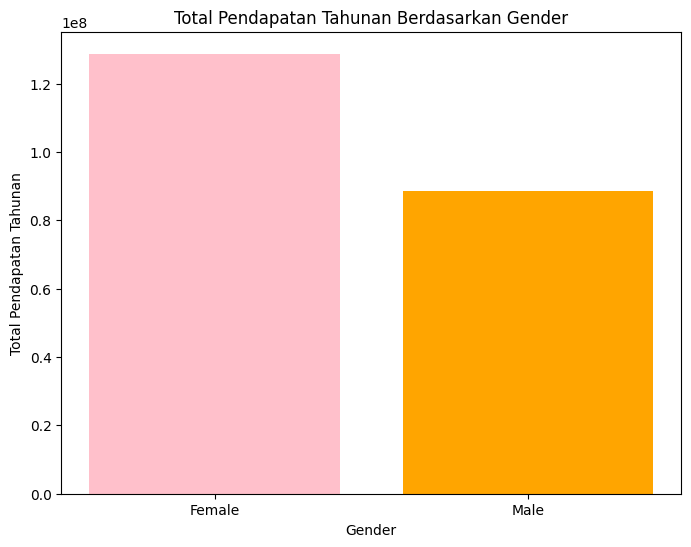

In [167]:
# Menghitung total Pendapatan Tahunan per Gender
total_income = df_cleaned.groupby('Jenis Kelamin')['Pendapatan Tahunan($)'].sum()

# Membuat barplot
plt.figure(figsize=(8, 6))
plt.bar(total_income.index, total_income.values, color=['pink', 'orange'])

plt.title('Total Pendapatan Tahunan Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Total Pendapatan Tahunan')

plt.show()

In [168]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# fit dan transformasi data menggunakan Min-Max Scaling
scaled_data = scaler.fit_transform(df_cleaned[['Pendapatan Tahunan($)']])

print("\nData setelah Min-Max Scaling:")
print(scaled_data)



Data setelah Min-Max Scaling:
[[0.07895817]
 [0.18423574]
 [0.45269353]
 ...
 [0.47880763]
 [0.9585996 ]
 [0.58223757]]


In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

z_score_data = scaler.fit_transform(df_cleaned[['Pendapatan Tahunan($)']])

print("\nData setelah Z-Score Transformation")
print(z_score_data)


Data setelah Z-Score Transformation
[[-2.08667453e+00]
 [-1.65020484e+00]
 [-5.37207112e-01]
 ...
 [-4.28940804e-01]
 [ 1.56022619e+00]
 [-1.31151925e-04]]


In [173]:
# Menentukan faktor penggeseran (scaling factor)
# misalnya data maximal kolom pendapatan tahunan untuk mengubah ke rentang 0-1
scaling_factor = max_df

# Melakukan transformasi Decimal Scaling
scaled_data = df_cleaned['Pendapatan Tahunan($)'] / scaling_factor

print("\nData setelah Decimal Scaling:")
print(scaled_data)


Data setelah Decimal Scaling:
ID Pelanggan
1       0.078958
2       0.184236
3       0.452694
4       0.310569
5       0.200027
          ...   
1996    0.970591
1997    0.385095
1998    0.478808
1999    0.958600
2000    0.582238
Name: Pendapatan Tahunan($), Length: 1965, dtype: float64
